# 2. Fundamentals

## 2.1. What is a Graph?

**Definición**: Un grafo $G$ consiste de una colección $V$ de vértices y una colección de enlaces $E$, para la cual denotamos $G = (V, E)$. 
Cada enlace $e \in E$ se dice que conecta dos vértices, los cuales son llamados sus puntos finales. Si $e$ conecta $u, v \in V$, escribimos $e = \langle u, v \rangle$. En este caso, los vértices $u$ y $v$ se denominan adyacentes.


El complemento de un grafo $G$, denotado como $\overline{G}$ es el grafo que se obtiene al remover todos los enlaces y conectando exactamente aquellos vértices que no son adyacentes en $G$.

Por supuesto, si tomamos un grafo $G$ y su complemento $\overline{G}$ y los unimos, obtendremos un grafo completo.


## 2.2. Subgraphs

## 2.3.Graph representations and data structures

Import Dependencies & Load dataset

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

Hay diferentes formas de representar un grafo. Quizas la mas comun es usar una *matriz de adyacencia*.
Considera un grafo $G$ con $n$ vertices y $m$ enlaces. Su matriz de adyacencia es una matriz $A$ con $n$ columnas y $n$ filas con entradas $A[i, j]$ denotando el numero de enlaces conectados por los vertices $v_i$ y $v_j$. 

La Figure 2.7 muestra un grafo simple con su respectiva matriz de adyacencia.

Que propiedades podemos ver de este ejemplo?

1. Un matriz de adyacencia es *simetrica*, si para todo $i$ y $j$, $A[i,j] = A[j,i]$. Esta propiedad refleja que el hecho de que un enlace es representado como un par de vertices no-ordenado (i.e., $e = \langle v_i, v_j \rangle = \langle v_j, v_i \rangle$).
2. Un grafo $G$ es simple si y solo so para cada $i$ y $j$, $A[i,j] \leq $ and $A[i,i] = 0$. En otras palabras, puede haber al menos un enlace uniendo los verticos $v_i$ y $v_j$ y, en particular, ningun enlace conecta a un vertice por si mismo.

Como una alternativa, tambien podemos usar la *matriz de incidencia* de un grafo como su representacion. Una matriz de incidencia $M$ del grafo $G$ consiste en $n$ filas y $m$ columnas tales que $M[i,j]$ cuenta el numer de veces que el enlace $e_j$ es incidente al vertice $v_i$.

Nota que $M[i,j]$ adquiere los valores 0, 1, o 2: un enlace puede solo tener incidencia con vertice $v_i$, tiene un vertice $v_i$ como exactamente uno de sus puntos de fin, o com un self-loop del vertice $v_i$. ( INCLUIR ESTO? )

Isomorfismo:

"""
Una importante observacion es que todas estas representacoines son idependientes de la forma en que dibujamos un grafo. Considera el grafo que se muestra en la figura 2.9.
No importa si representamos el grafo por su matriz de adyacencia, su matris de incidencia, su lista de enlaces, o si adjuntamos etiquietas a vertices y enlaces, encontraremos que su respectiva representacion es exactamente la misma. Como consecuencia, deberian ser consideradas como lo mismo. Esta nocion de similaridad es formalizado atraves de lo que conocemos como isomorfismo de grafos.

**Definicion**: Consideremos dos grafos $G = (V,E)$ y $G^* = (V^*, E^*)$. $G$ y $G^*$ son *isomorfos* si existe un mapeo uno a uno del tipo $\phi : V \rightarrow V^*$ tal que para cada enalce $e \in E$ con $e = \langle u, v \rangle$, existe un unico enlace $e^* \in E^*$ con $e^* = \langle \phi(u), \phi(v) \rangle$.



"""

In [ ]:
def draw_graph_and_adjmatrix(G, node_labels, edge_labels):
  pos = nx.layout.spectral_layout(G)
  pos = nx.spring_layout(G, pos=pos, iterations=20, seed=0)
  # Create position copies for shadows, and shift shadows
  #pos_shadow = copy.deepcopy(pos)
  #shift_amount = 0.0 #015
  #for idx in pos_shadow:
  #    pos_shadow[idx][0] += shift_amount
  #    pos_shadow[idx][1] -= shift_amount

  fig, axs = plt.subplots(figsize=(7,3), facecolor='w', nrows=1, ncols=2, constrained_layout=True)
  #nx.draw_networkx_nodes(G, pos_shadow, node_color='k', alpha=0.5, ax=axs[0])
  nx.draw_networkx_nodes(G, pos, node_color="#cf52a5", linewidths=1, ax=axs[0], node_size=800)
  nx.draw_networkx_edges(G, pos, width=2, ax=axs[0])
  nx.draw_networkx_labels(G, pos, labels=node_labels, ax=axs[0], font_size=14)
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=axs[0], font_size=16)
  axs[0].axis('off')

  A = nx.adjacency_matrix(G)
  axs[1].imshow(A.todense(), cmap='Greys_r')
  axs[1].set_xticks(range(len(node_labels))); 
  axs[1].set_yticks(range(len(node_labels))); 
  axs[1].set_xticklabels(node_labels.values(), fontsize=14); 
  axs[1].set_yticklabels(node_labels.values(), fontsize=14);
  print (node_labels.values())
  axs[1].axis('on')

In [ ]:
node_labels = [0,1,2,3,4]
edge_labels = [(0, 1), (0,2), (1,2), (2,3), (3,4), (1,3)]

In [ ]:
dict({(edge_labels[i][0], edge_labels[i][1]) : ("$e_%i$" % i) for i in range(len(edge_labels))})

{(0, 1): '$e_0$',
 (0, 2): '$e_1$',
 (1, 2): '$e_2$',
 (2, 3): '$e_3$',
 (3, 4): '$e_4$',
 (1, 3): '$e_5$'}

In [ ]:
def example_graph_formalities(node_labels, edge_labels):
  G = nx.Graph()
  G.add_nodes_from(node_labels)
  G.add_edges_from(edge_labels)
  draw_graph_and_adjmatrix(
      G=G, node_labels=dict({i:"$v_%i$" % i for i in node_labels }), #{1:"$v_1$", 2 :"$v_2$", 3:"$v_3$", 4:"$v_4$"}, 
      edge_labels=dict({(edge_labels[i][0], edge_labels[i][1]) : ("$e_%i$" % i) for i in range(len(edge_labels))})
  )

### 2.3.1. Adjacency matrix

dict_values(['$v_0$', '$v_1$', '$v_2$', '$v_3$', '$v_4$'])


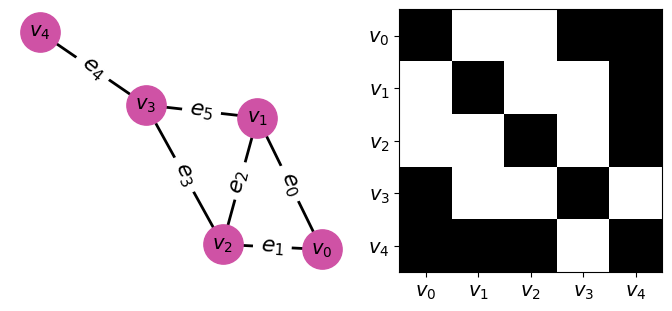

In [ ]:
example_graph_formalities(node_labels, edge_labels)

### 2.3.2. Incidence matrix

In [ ]:
def get_incidence_matrix(node_labels, edge_labels):
  M = len(edge_labels)
  N = len(node_labels)
  mat = np.zeros(shape=(N,M), dtype=np.int8)
  for i in range(M):
    mat[edge_labels[i][0], i] += 1
    mat[edge_labels[i][1], i] += 1
  return mat

get_incidence_matrix(node_labels=node_labels, edge_labels=edge_labels)

array([[1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 1],
       [0, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 1, 0]], dtype=int8)

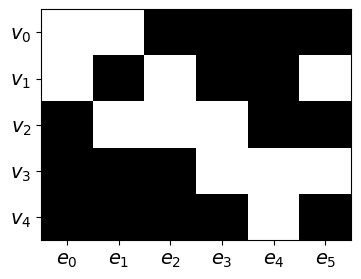

In [ ]:
fig, axs = plt.subplots(figsize=(4,3), facecolor='w', nrows=1, ncols=1)
axs.imshow(get_incidence_matrix(node_labels=node_labels, edge_labels=edge_labels), cmap='Greys_r', aspect='auto')
axs.set_yticks(node_labels); 
axs.set_yticklabels(dict({i:"$v_%i$" % i for i in node_labels }).values(), fontsize=14)
axs.set_xticks(range(len(edge_labels)))
axs.set_xticklabels(dict({(edge_labels[i][0], edge_labels[i][1]) : ("$e_%i$" % i) for i in range(len(edge_labels))}).values(), fontsize=14); 

### 2.3.3. List of edges



$(\langle v_0, v_1 \rangle, \langle v_0, v_2 \rangle, \langle v_1, v_2 \rangle, \langle v_2, v_3 \rangle, \langle v_3, v_4 \rangle, \langle v_1, v_3 \rangle)$ 

## 2.4. Grafo Bipartito

#### 2.4.1. Definition

**Definición**: Un grafo $G$ es *bipartito* si $V(G)$ puede ser particionado en dos subsets disjuntos $V1$ y $V2$ tal que cada $e \in E(G)$ conecta un nodo en $V_1$ y otro en $V_2$: $E(G) \subseteq \{ e = \langle u_1, u_2 \rangle | u_1 \in V_1, u_2 \in V2 \}$.

### 2.4.2. Applications

## 2.5. Grafo planar

### 2.5.1. Definition

**Definición**: Un grafo $G$ es *planar* si existe un *embedding* tal que se puede representar tal que dos enlaces no se intersectan.

### 2.5.2. Applications

----